
Логика

У вас есть два шарика, которые разбиваются при падении с одной и той же высоты и здание из 100 этажей. Вы можете подниматься на любой этаж и бросать с него один из шариков.
За какое минимальное количество бросков шариков можно выяснить наименьший номер этажа, при падении с которого шарики разбиваются?

Для решения данной задачи используем формулу вычисления суммы ряда последовательных натуральных чисел:
\begin{align}
        \ \sum_{n=1}^kn =  \frac{k(k + 1)}{2},  где
    \end{align}
    k - число бросков, n - количесвто этажей.

  Для нахождения числа бросков требуется решить квадратное уравнение:
\begin{align}
        \ k^2 + k - 2n = 0
    \end{align}
  Для этого используем формулу дискриминанта:
  \begin{align}
        \ D = b^2 - 4 \cdot a \cdot c
    \end{align}
    И нахождение корней: 
    \begin{align}
        \ x_1,_2 =  \frac{-1 \pm \sqrt(D)}{2}
    \end{align}

In [ ]:
import math
n = 100
D = 1 - 4 * 1 * (-2 * n)
# Так как нас интересует только значение > 0
x = (-1 + math.sqrt(D)) / 2
print(x)
# Округляем данное значение до целого числа в большую сторону
x = math.ceil(x)
print(x)

13.650971698084906
14


Для дома, высотой 100 этажей, потребуется максимум 14 бросков для нахождения минимального этажа, при котором разбиваются шары.
Для нахождения минимального количества бросков, нужно определить минимальный этаж, на котором разобьется шар.

In [ ]:
# Напишем алгоритм поиска минимальных бросков:
b = int(input("Введите этаж на котором шар разобьется: "))
a = x
count = 0
temp = 0
c = a
if a == b:
    for i in range(a):
        count += 1
else:
    while a != b:
        # Если шар не разбился
        if a < b:
            temp = a
            count += 1
            a += c - count
            # Если значение следующего этажа, с которого будем бросать шар больше максимаьного
            if a > n:
                a = temp + 1
        # Если шар разбился
        if a > b:
            for i in range(a - temp):
                count += 1
                a = temp
                a += i + 1
                if a == b:
                    break
    if a == b:
        count += 1

print(f'Потребовалось бросков: {count}')

Введите этаж на котором шар разобьется: 57
Потребовалось бросков: 12


Математика + программирование


Дана кусочно-постоянная функция F: \begin{align}
        \ f(x) = \left\{
        \begin{array}{cl}
        a & x < c \\
        b & x \ge c
        \end{array}
        \right.
    \end{align}

Напишите на любом ЯП (предпочтительно Python 3) программу, которая принимает на вход массив A пар (x, y) длины n, и возвращает кортеж из трех элементов (a, b, c), соответствующих параметрам функции F, при которых среднеквадратическое отклонение функции от точек из A минимально.
Визуализация решения приветствуется.



In [ ]:
import numpy as np
from scipy.optimize import minimize

def mnk(A):
    x = np.array([a[0] for a in A])
    y = np.array([a[1] for a in A])

    # Определение функции для метода наименьших квадратов
    def objective(params):
        a, b, c = params
        y_pred = np.piecewise(x, [x < c, x >= c], [a, b])
        return np.mean((y - y_pred) ** 2)

    # Нахождение оптимальных параметров методом минимизации
    res = minimize(objective, x0=[np.min(y), np.max(y), np.mean(x)])
    a, b, c = res.x

    # Визуализация результатов
    import matplotlib.pyplot as plt
    plt.scatter(x, y)
    plt.plot(x, np.piecewise(x, [x < c, x >= c], [a, b]), 'r')
    plt.show()

    return a, b, c

In [ ]:
n = int(input("Введите число пар точек: "))
A = []
for i in range(n):
    x, y = map(int, input("Введите координаты точки через пробел: ").split())
    A.append((x, y))

Введите число пар точек: 5
Введите координаты точки через пробел: 1 2
Введите координаты точки через пробел: 3 4
Введите координаты точки через пробел: 5 6
Введите координаты точки через пробел: 8 9
Введите координаты точки через пробел: 15 20


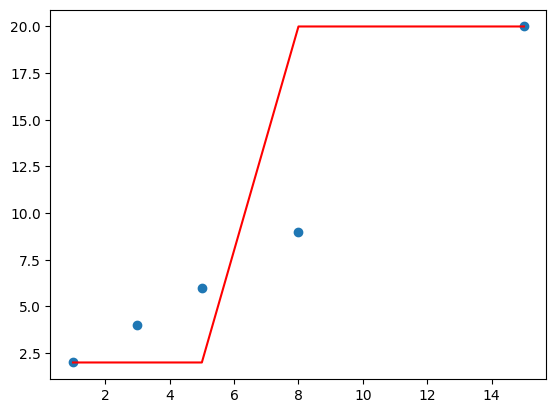

2.0 20.0 6.4


In [ ]:
a, b, c = mnk(A)
print(a, b, c)